## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# Importing Data and Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
#loading and data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking number of rows and columns
df.shape

(9240, 37)

In [4]:
#checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Exploratory Data Analysis

## Data Cleaning

In [5]:
#dropping those columns as they both have unique values
df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [6]:
#converting 'Select' to null values

df = df.replace('Select', np.nan)

In [7]:
#checking for null values

round((df.isnull().sum()/len(df.index))*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
#dropping columns with more than 40% null values

cols = df.columns

for i in cols:
    if (((df[i].isnull().sum()/len(df.index))*100) >= 40):
        df.drop(i, axis = 1, inplace = True)

In [9]:
#checking for null values

round((df.isnull().sum()/len(df.index))*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Categorical Variable Analysis

In [10]:
#checking Country column distribution

df['Country'].value_counts(normalize=True, dropna=False)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [11]:
df['Country'] = df['Country'].replace(np.nan, 'India')

### As there are high number of values for India we can drop this column.

In [12]:
#creating a list of columns for dropping

cols_drop = ['Country']

In [13]:
#checking City column distribution

df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [14]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')

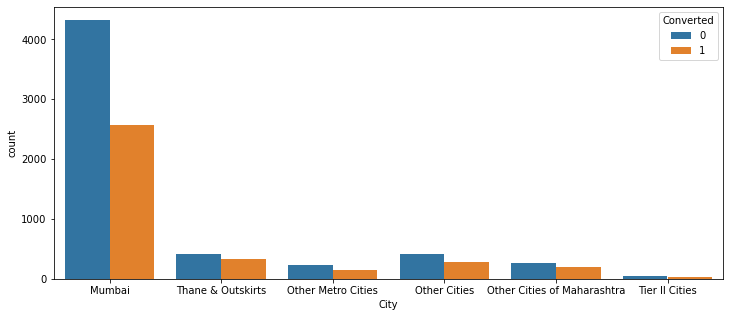

In [15]:
#plotting distribution of City

plt.figure(figsize = (12,5))
sns.countplot(df['City'], hue = df['Converted'])
plt.show()

In [16]:
#checking Specialization column distribution

df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
#replacing null values with Not Decided as they may not be sure what to choose before going through the course.

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Decided')

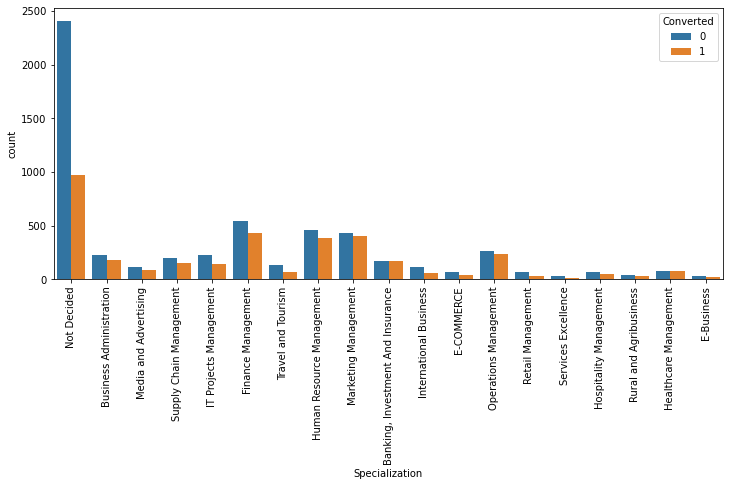

In [18]:
#plotting distribution of Specialization

plt.figure(figsize = (12,5))
s=sns.countplot(df['Specialization'], hue = df['Converted'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [19]:
#combing Managment as there are too many specializations for this category

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'], 'Managment')

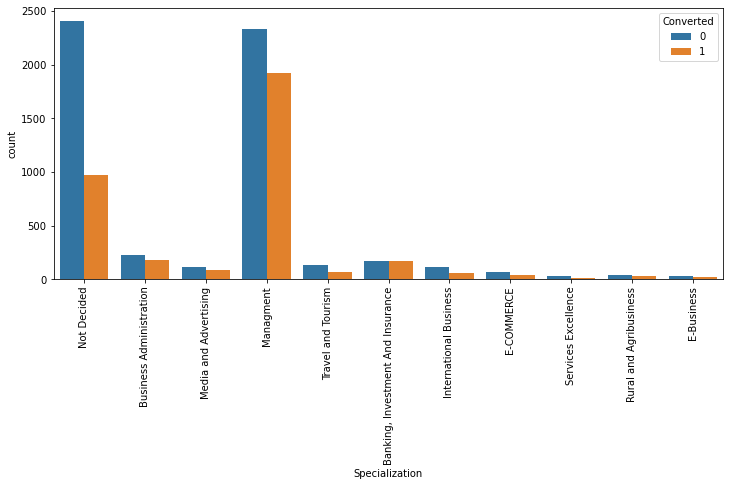

In [20]:
#plotting distribution of Specialization

plt.figure(figsize = (12,5))
s=sns.countplot(df['Specialization'], hue = df['Converted'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [21]:
#checking What is your current occupation
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

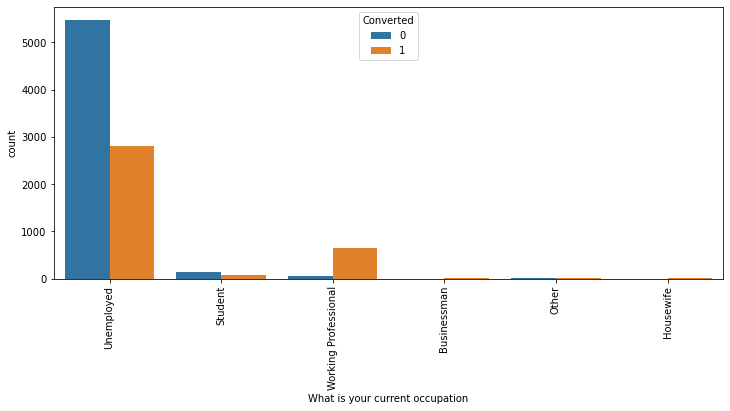

In [23]:
#plotting distribution

plt.figure(figsize = (12,5))
s=sns.countplot(df['What is your current occupation'], hue = df['Converted'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

### Working Professionals have higher percentage of conversion

In [24]:
#checking What matters most to you in choosing a course
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [26]:
#most of the data is skewed so we can drop this column
cols_drop.append('What matters most to you in choosing a course')
cols_drop

['Country', 'What matters most to you in choosing a course']

In [27]:
#checking Tags
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [28]:
df['Tags'] = df['Tags'].replace(np.nan, 'Non Specified')

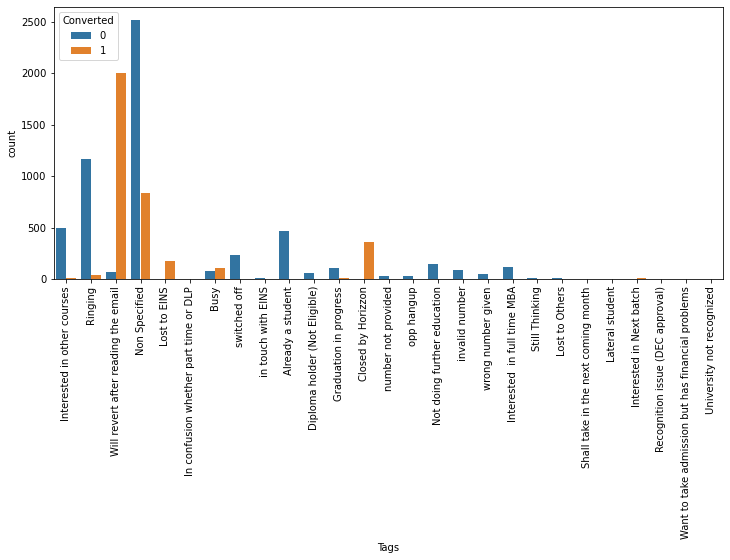

In [29]:
#plotting distribution

plt.figure(figsize = (12,5))
s=sns.countplot(df['Tags'], hue = df['Converted'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

#### Will revert after reading the email has a very high amout of conversion.

In [30]:
#merging low frequency tags

df['Tags']=df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education','invalid number',
                                       'wrong number given','Interested  in full time MBA'], 'Other')

In [31]:
#checking Lead Source
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [32]:
#merging low frequency values
df['Lead Source'] = df['Lead Source'].replace([np.nan,'google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook', 'Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'], 'Others')

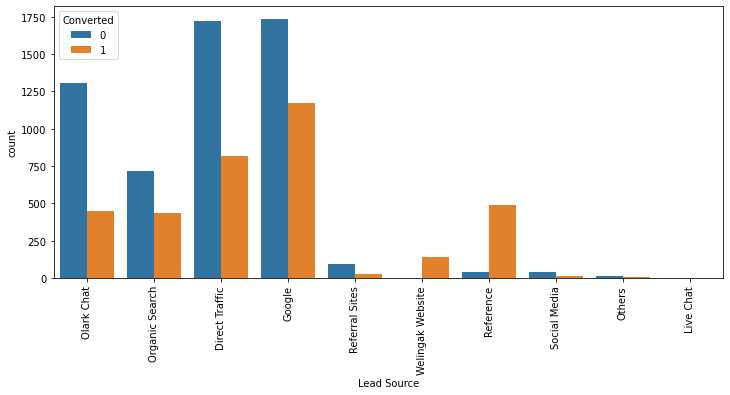

In [33]:
#plotting distribution

plt.figure(figsize = (12,5))
s=sns.countplot(df['Lead Source'], hue = df['Converted'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

#### Welingak and Refrence has high conversion percentages.

In [34]:
#checking Last Activity
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
#merging low frequency values
df['Last Activity'] = df['Last Activity'].replace(np.nan, 'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'], 'Others')

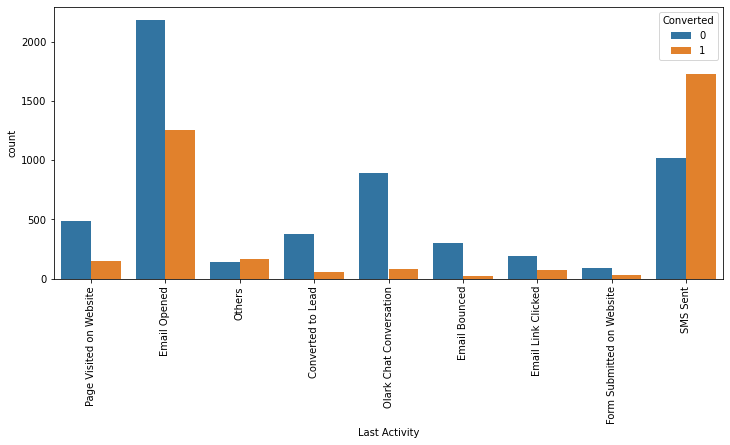

In [36]:
#plotting distribution

plt.figure(figsize = (12,5))
s=sns.countplot(df['Last Activity'], hue = df['Converted'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

#### SMS Sent shows a high amout of conversion rate.

In [37]:
#checking for null values

round((df.isnull().sum()/len(df.index))*100, 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [38]:
#dropping null values
df = df.dropna()

In [39]:
#checking for null values

round((df.isnull().sum()/len(df.index))*100, 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [40]:
#checking Lead Origin
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

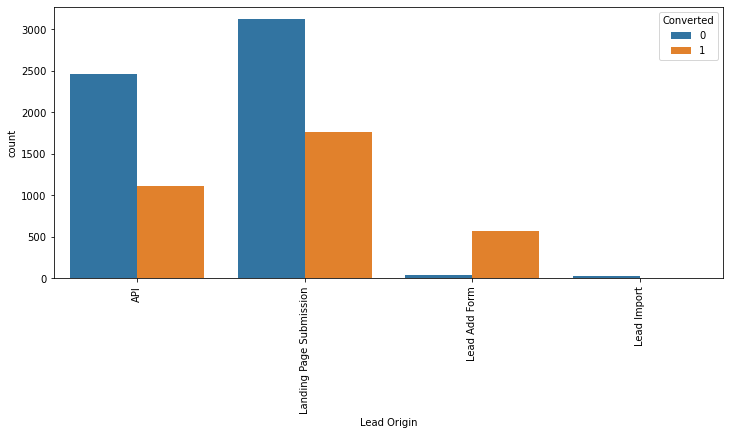

In [41]:
#plotting distribution

plt.figure(figsize = (12,5))
s=sns.countplot(df['Lead Origin'], hue = df['Converted'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

### Lead Add Form has high conversion rate but count of leads.

In [42]:
#checking Do Not Call
df['Do Not Call'].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [43]:
#we can drop Do Not Call as the data is skewed
cols_drop.append('Do Not Call')
cols_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [44]:
#checking Do Not Email
df['Do Not Email'].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

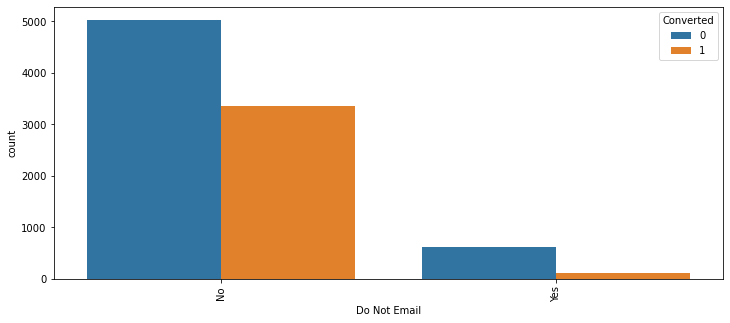

In [45]:
#plotting distribution

plt.figure(figsize = (12,5))
s=sns.countplot(df['Do Not Email'], hue = df['Converted'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [46]:
#checking Search
df['Search'].value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [47]:
#checking Magazine
df['Magazine'].value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [48]:
#checking Newspaper Article
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [49]:
#checking X Education Forums
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [50]:
#checking Newspaper
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [51]:
#checking Digital Ads
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [52]:
#checking Through Recommendation
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [53]:
#checking Update me on Supply Chain Content
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [54]:
#checking Receive More Updates About Our Courses
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [55]:
#checking Get updates on DM Content
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [56]:
#checking I agree to pay the amount through cheque
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [57]:
#checking A free copy of Mastering The Interview
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [58]:
#checking Last Notable Activity
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [59]:
#merging low frequency values
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable', 'Unsubscribed',
                                                                         'Email Bounced', 'Resubscribed to emails',
                                                                       'View in browser link Clicked', 'Approached upfront', 
                                                                       'Form Submitted on Website', 'Email Received'], 'Other_activity')

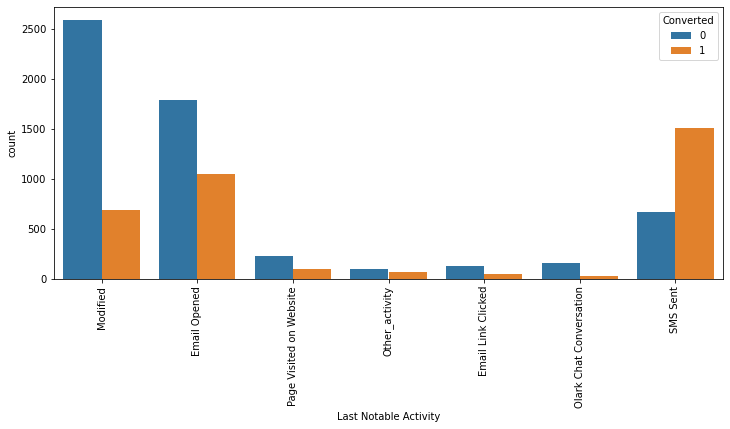

In [60]:
#plotting distribution

plt.figure(figsize = (12,5))
s=sns.countplot(df['Last Notable Activity'], hue = df['Converted'])
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()

In [61]:
#dropping skewed columns
cols_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])
cols_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [62]:
#dropping columns
df = df.drop(cols_drop, axis=1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

## Numerical Variable Analysis

In [64]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


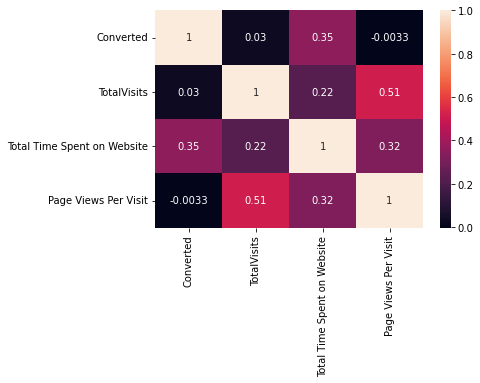

In [65]:
#plotting heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

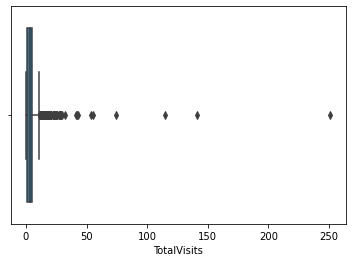

In [66]:
#checking Total Visits
sns.boxplot(df['TotalVisits'])
plt.show()

#### We can observe the presence of outliers

In [67]:
#checking percentiles
df['TotalVisits'].describe(percentiles=[0.25,0.50,0.75,0.90,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

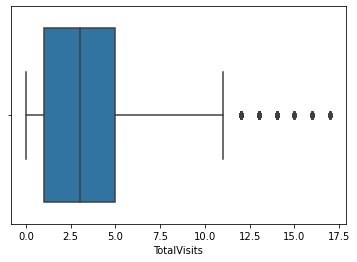

In [68]:
#outlier treatment
Q4 = df['TotalVisits'].quantile(0.99)
df = df[(df['TotalVisits']<=Q4)]

sns.boxplot(df['TotalVisits'])
plt.show()

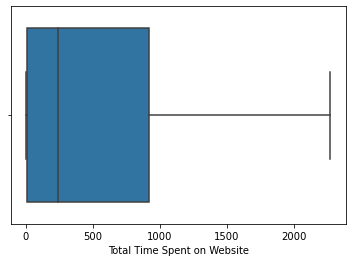

In [69]:
#checking Total Time Spent on Website
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

#### No outliers present.

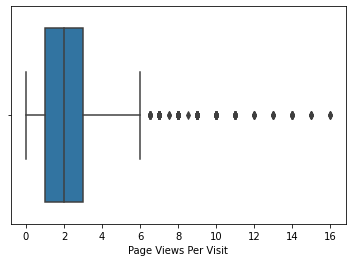

In [70]:
#checking Page Views Per Visit
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [71]:
#checking percentiles
df['Page Views Per Visit'].describe(percentiles=[0.25,0.50,0.75,0.90,0.99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

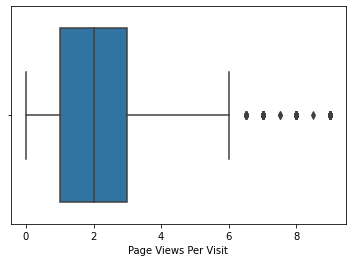

In [72]:
#treating outliers
Q4 = df['Page Views Per Visit'].quantile(0.99)
df = df[(df['Page Views Per Visit']<=Q4)]

sns.boxplot(df['Page Views Per Visit'])
plt.show()

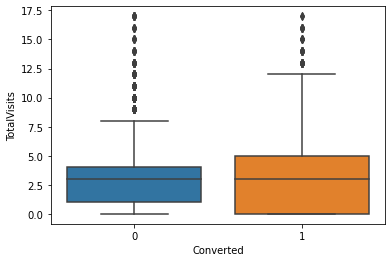

In [73]:
#checking spread of Total Visits vs Converted
sns.boxplot(y='TotalVisits', x='Converted', data=df)
plt.show()

#### Median for both are close, so nothing conclusive can be said about this column.

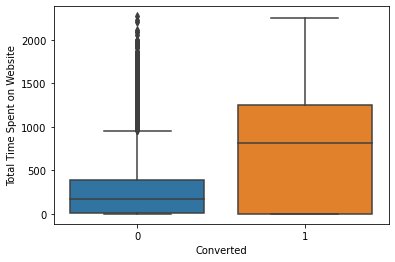

In [74]:
#checking spread of Total Time Spent on Website vs Converted
sns.boxplot(y='Total Time Spent on Website', x='Converted', data=df)
plt.show()

#### Leads spending more time on the website have high conversion rate.

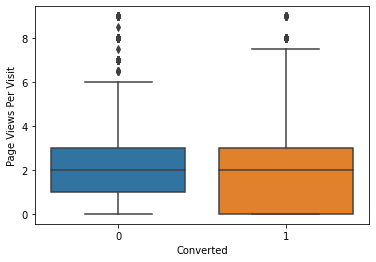

In [75]:
#checking spread of Page Views Per Visit
sns.boxplot(y='Page Views Per Visit', x='Converted', data=df)
plt.show()

#### Median for both are close, so nothing conclusive can be said about this column.

# Data Preparation

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [77]:
#making a list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [78]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Decided,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Decided,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Decided,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [79]:
#list of variable to map 1 to 'Yes' and 0 to 'No'
varlist = ['A free copy of Mastering The Interview', 'Do Not Email']

def binary_map(x):
    return x.map({'Yes' : 1, 'No' : 0})

df[varlist] = df[varlist].apply(binary_map)

## Dummy Creation

In [80]:
#creating dummies for a few columns and dropping the first one
dummy = pd.get_dummies(df[['Lead Origin', 'What is your current occupation', 'City']], drop_first = True)

#merging data frames
df = pd.concat([df, dummy], axis=1)

In [81]:
#creating dummies for remaining categorical columns

#Lead Source
LS = pd.get_dummies(df['Lead Source'], prefix = 'Lead Source')
LS1 = LS.drop(['Lead Source_Others'], axis = 1)
df = pd.concat([df, LS1], axis = 1)

#Last Activity
LA = pd.get_dummies(df['Last Activity'], prefix = 'Last Activity')
LA1 = LA.drop(['Last Activity_Others'], axis = 1)
df = pd.concat([df, LA1], axis = 1)

#Specialization
SP = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
SP1 = SP.drop(['Specialization_Not Decided'], axis = 1)
df = pd.concat([df, SP1], axis = 1)

#Tags
TG = pd.get_dummies(df['Tags'], prefix = 'Tags')
TG1 = TG.drop(['Tags_Non Specified'], axis = 1)
df = pd.concat([df, TG1], axis = 1)

#Last Notable Activity
LNA = pd.get_dummies(df['Last Notable Activity'], prefix = 'Last Notable Activity')
LNA1 = LNA.drop(['Last Notable Activity_Other_activity'], axis = 1)
df = pd.concat([df, LNA1], axis = 1)

In [82]:
#dropping original categorical columns
df.drop(cat_cols, axis = 1, inplace = True)

In [83]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## Test - Train Split

In [84]:
#putting target variable in y
y = df['Converted']

#putting features in X
X = df.drop('Converted', axis = 1)

In [85]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.7, test_size=0.3, random_state = 100)

In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Other                 6267 non-null   uint8  
 8   What is your current occupation_Student               6

## Scaling Data

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


# Model Building

## Feature Selecting using RFE

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [91]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True])

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('What is your current occupation_Housewife', False, 25),
 ('What is your current occupation_Other', False, 29),
 ('What is your current occupation_Student', False, 19),
 ('What is your current occupation_Unemployed', False, 16),
 ('What is your current occupation_Working Professional', False, 3),
 ('City_Other Cities', False, 18),
 ('City_Other Cities of Maharashtra', False, 32),
 ('City_Other Metro Cities', False, 35),
 ('City_Thane & Outskirts', False, 33),
 ('City_Tier II Cities', False, 24),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Ref

In [93]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',


## Building model using Statsmodle.api

In [95]:
import statsmodels.api as sm

In [96]:
#Model 1
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1218.0
Date:                Fri, 14 Apr 2023   Deviance:                       2435.9
Time:                        12:42:40   Pearson chi2:                 8.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6094
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3742      0.130     -2.887      0.004      -0.628      -0.120
Total Time Spent on Website                       1.0836      0.061     17.686      0.000       0.963       1.204
Lead Origin_Lead Add Form                         1.1544      0.451      2.559      0.010       0.270       2.039
Lead Source_Direct Traffic                       -1.7309      0.177     -9.761      0.000      -2.079      -1.383
Lead Source_Google                               -1.1346      0.159     -7.115      0.000      -1.447      -0.822
Lead Source_Organic Search                       -1.2206      0.202     -6.055      0.000      -1.616      -0.826
Lead Source_Referral Sites                       -1.3655      0.486     -2.812      0.005      -2.317      -0.414
Lead Source_Welingak Website                      3.8516      1.111      3.466      0.001       1.674       6.030
Last Activity_Email Bounced                      -1.1519      0.464     -2.482      0.013      -2.061      -0.242
Last Activity_Olark Chat Conversation            -0.8823      0.298     -2.960      0.003      -1.467      -0.298
Last Activity_SMS Sent                            1.0662      0.242      4.407      0.000       0.592       1.540
Tags_Closed by Horizzon                           6.9691      1.019      6.838      0.000       4.972       8.967
Tags_Interested in other courses                 -2.1653      0.411     -5.269      0.000      -2.971      -1.360
Tags_Lost to EINS                                 5.7160      0.617      9.271      0.000       4.508       6.924
Tags_Other                                       -2.3765      0.214    -11.112      0.000      -2.796      -1.957
Tags_Ringing                                     -3.5606      0.245    -14.540      0.000      -4.041      -3.081
Tags_Will revert after reading the email          4.5177      0.189     23.884      0.000       4.147       4.888
Last Notable Activity_Email Link Clicked         -1.2697      0.469     -2.710      0.007      -2.188      -0.351
Last Notable Activity_Modified                   -1.0768      0.173     -6.221      0.000      -1.416      -0.738
Last Notable Activity_Olark Chat Conversation    -1.3085      0.568     -2.305      0.021      -2.421      -0.196
Last Notable Activity_SMS Sent                    1.1657      0.274      4.249      0.000       0.628       1.703
=================================================================================================================
"""

In [97]:
#dropping Last Notable Activity_Olark Chat Conversation as it has high p-value
col = col.drop('Last Notable Activity_Olark Chat Conversation')

In [98]:
#Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1220.9
Date:                Fri, 14 Apr 2023   Deviance:                       2441.9
Time:                        12:42:40   Pearson chi2:                 8.30e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6090
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4079      0.129     -3.166      0.002      -0.660      -0.155
Total Time Spent on Website                  1.0709      0.061     17.645      0.000       0.952       1.190
Lead Origin_Lead Add Form                    1.1461      0.450      2.547      0.011       0.264       2.028
Lead Source_Direct Traffic                  -1.7252      0.177     -9.749      0.000      -2.072      -1.378
Lead Source_Google                          -1.1306      0.159     -7.112      0.000      -1.442      -0.819
Lead Source_Organic Search                  -1.2158      0.202     -6.030      0.000      -1.611      -0.821
Lead Source_Referral Sites                  -1.3538      0.482     -2.810      0.005      -2.298      -0.410
Lead Source_Welingak Website                 3.8655      1.111      3.480      0.001       1.688       6.043
Last Activity_Email Bounced                 -1.1984      0.463     -2.590      0.010      -2.105      -0.291
Last Activity_Olark Chat Conversation       -1.3152      0.248     -5.300      0.000      -1.802      -0.829
Last Activity_SMS Sent                       0.9626      0.236      4.083      0.000       0.501       1.425
Tags_Closed by Horizzon                      6.9374      1.018      6.812      0.000       4.941       8.934
Tags_Interested in other courses            -2.1792      0.411     -5.307      0.000      -2.984      -1.374
Tags_Lost to EINS                            5.7158      0.621      9.210      0.000       4.499       6.932
Tags_Other                                  -2.3686      0.213    -11.101      0.000      -2.787      -1.950
Tags_Ringing                                -3.5485      0.245    -14.513      0.000      -4.028      -3.069
Tags_Will revert after reading the email     4.5173      0.189     23.933      0.000       4.147       4.887
Last Notable Activity_Email Link Clicked    -1.2429      0.468     -2.655      0.008      -2.160      -0.325
Last Notable Activity_Modified              -0.9396      0.160     -5.854      0.000      -1.254      -0.625
Last Notable Activity_SMS Sent               1.2983      0.267      4.864      0.000       0.775       1.821
============================================================================================================
"""

In [99]:
#dropping Lead Origin_Lead Add Form as it has high p-value
col = col.drop('Lead Origin_Lead Add Form')

In [100]:
#Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1224.4
Date:                Fri, 14 Apr 2023   Deviance:                       2448.8
Time:                        12:42:40   Pearson chi2:                 8.48e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6086
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3602      0.126     -2.849      0.004      -0.608      -0.112
Total Time Spent on Website                  1.0657      0.061     17.548      0.000       0.947       1.185
Lead Source_Direct Traffic                  -1.7981      0.175    -10.302      0.000      -2.140      -1.456
Lead Source_Google                          -1.1825      0.157     -7.534      0.000      -1.490      -0.875
Lead Source_Organic Search                  -1.2813      0.200     -6.404      0.000      -1.673      -0.889
Lead Source_Referral Sites                  -1.4152      0.484     -2.927      0.003      -2.363      -0.467
Lead Source_Welingak Website                 4.9590      1.024      4.843      0.000       2.952       6.966
Last Activity_Email Bounced                 -1.2015      0.466     -2.578      0.010      -2.115      -0.288
Last Activity_Olark Chat Conversation       -1.3580      0.249     -5.458      0.000      -1.846      -0.870
Last Activity_SMS Sent                       0.9873      0.235      4.201      0.000       0.527       1.448
Tags_Closed by Horizzon                      7.2411      1.013      7.148      0.000       5.256       9.227
Tags_Interested in other courses            -2.1621      0.411     -5.255      0.000      -2.968      -1.356
Tags_Lost to EINS                            5.7741      0.620      9.316      0.000       4.559       6.989
Tags_Other                                  -2.3446      0.213    -11.018      0.000      -2.762      -1.928
Tags_Ringing                                -3.5004      0.243    -14.417      0.000      -3.976      -3.025
Tags_Will revert after reading the email     4.6086      0.186     24.832      0.000       4.245       4.972
Last Notable Activity_Email Link Clicked    -1.2653      0.464     -2.725      0.006      -2.175      -0.355
Last Notable Activity_Modified              -0.9526      0.161     -5.917      0.000      -1.268      -0.637
Last Notable Activity_SMS Sent               1.2938      0.266      4.856      0.000       0.772       1.816
============================================================================================================
"""

In [101]:
#dropping Last Activity_Email Bounced as it has high p-value
col = col.drop('Last Activity_Email Bounced')

In [102]:
#Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1228.5
Date:                Fri, 14 Apr 2023   Deviance:                       2456.9
Time:                        12:42:41   Pearson chi2:                 8.35e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6081
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3854      0.126     -3.058      0.002      -0.632      -0.138
Total Time Spent on Website                  1.0606      0.060     17.534      0.000       0.942       1.179
Lead Source_Direct Traffic                  -1.8079      0.174    -10.381      0.000      -2.149      -1.467
Lead Source_Google                          -1.1749      0.157     -7.495      0.000      -1.482      -0.868
Lead Source_Organic Search                  -1.2857      0.200     -6.433      0.000      -1.677      -0.894
Lead Source_Referral Sites                  -1.3912      0.483     -2.879      0.004      -2.338      -0.444
Lead Source_Welingak Website                 4.9238      1.022      4.816      0.000       2.920       6.928
Last Activity_Olark Chat Conversation       -1.2913      0.248     -5.213      0.000      -1.777      -0.806
Last Activity_SMS Sent                       1.0887      0.233      4.679      0.000       0.633       1.545
Tags_Closed by Horizzon                      7.2881      1.013      7.193      0.000       5.302       9.274
Tags_Interested in other courses            -2.1665      0.413     -5.250      0.000      -2.975      -1.358
Tags_Lost to EINS                            5.8139      0.620      9.381      0.000       4.599       7.029
Tags_Other                                  -2.3413      0.212    -11.019      0.000      -2.758      -1.925
Tags_Ringing                                -3.4918      0.243    -14.384      0.000      -3.968      -3.016
Tags_Will revert after reading the email     4.6334      0.186     24.962      0.000       4.270       4.997
Last Notable Activity_Email Link Clicked    -1.2507      0.466     -2.685      0.007      -2.164      -0.338
Last Notable Activity_Modified              -1.0294      0.159     -6.493      0.000      -1.340      -0.719
Last Notable Activity_SMS Sent               1.2163      0.265      4.590      0.000       0.697       1.736
============================================================================================================
"""

In [103]:
#dropping Last Notable Activity_Email Link Clicked as it has high p-value
col = col.drop('Last Notable Activity_Email Link Clicked')

In [104]:
#Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1232.7
Date:                Fri, 14 Apr 2023   Deviance:                       2465.4
Time:                        12:42:41   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6075
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4501      0.124     -3.635      0.000      -0.693      -0.207
Total Time Spent on Website                  1.0661      0.061     17.614      0.000       0.947       1.185
Lead Source_Direct Traffic                  -1.7872      0.174    -10.280      0.000      -2.128      -1.446
Lead Source_Google                          -1.1467      0.156     -7.338      0.000      -1.453      -0.840
Lead Source_Organic Search                  -1.2647      0.199     -6.341      0.000      -1.656      -0.874
Lead Source_Referral Sites                  -1.3826      0.489     -2.830      0.005      -2.340      -0.425
Lead Source_Welingak Website                 4.9152      1.020      4.818      0.000       2.916       6.915
Last Activity_Olark Chat Conversation       -1.2569      0.247     -5.080      0.000      -1.742      -0.772
Last Activity_SMS Sent                       1.0888      0.233      4.682      0.000       0.633       1.545
Tags_Closed by Horizzon                      7.2410      1.013      7.146      0.000       5.255       9.227
Tags_Interested in other courses            -2.1658      0.413     -5.246      0.000      -2.975      -1.357
Tags_Lost to EINS                            5.7544      0.618      9.305      0.000       4.542       6.967
Tags_Other                                  -2.3503      0.212    -11.064      0.000      -2.767      -1.934
Tags_Ringing                                -3.4925      0.243    -14.360      0.000      -3.969      -3.016
Tags_Will revert after reading the email     4.6197      0.184     25.048      0.000       4.258       4.981
Last Notable Activity_Modified              -0.9843      0.158     -6.235      0.000      -1.294      -0.675
Last Notable Activity_SMS Sent               1.2630      0.265      4.775      0.000       0.745       1.781
============================================================================================================
"""

In [105]:
#dropping Lead Source_Referral Sites as it has high p-value
col = col.drop('Lead Source_Referral Sites')

In [106]:
#Model 6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.4
Date:                Fri, 14 Apr 2023   Deviance:                       2474.7
Time:                        12:42:41   Pearson chi2:                 8.36e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5463      0.120     -4.541      0.000      -0.782      -0.311
Total Time Spent on Website                  1.0455      0.060     17.408      0.000       0.928       1.163
Lead Source_Direct Traffic                  -1.6856      0.170     -9.898      0.000      -2.019      -1.352
Lead Source_Google                          -1.0441      0.152     -6.848      0.000      -1.343      -0.745
Lead Source_Organic Search                  -1.1621      0.196     -5.920      0.000      -1.547      -0.777
Lead Source_Welingak Website                 4.9910      1.020      4.893      0.000       2.992       6.990
Last Activity_Olark Chat Conversation       -1.2127      0.248     -4.899      0.000      -1.698      -0.728
Last Activity_SMS Sent                       1.1106      0.232      4.785      0.000       0.656       1.565
Tags_Closed by Horizzon                      7.2690      1.013      7.176      0.000       5.283       9.254
Tags_Interested in other courses            -2.2670      0.419     -5.405      0.000      -3.089      -1.445
Tags_Lost to EINS                            5.7609      0.617      9.336      0.000       4.551       6.970
Tags_Other                                  -2.3501      0.212    -11.074      0.000      -2.766      -1.934
Tags_Ringing                                -3.4803      0.243    -14.343      0.000      -3.956      -3.005
Tags_Will revert after reading the email     4.6121      0.184     25.086      0.000       4.252       4.972
Last Notable Activity_Modified              -0.9854      0.158     -6.242      0.000      -1.295      -0.676
Last Notable Activity_SMS Sent               1.2507      0.264      4.740      0.000       0.734       1.768
============================================================================================================
"""

## Checking VIF

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.58
6,Last Activity_SMS Sent,6.43
13,Last Notable Activity_Modified,2.37
2,Lead Source_Google,1.76
1,Lead Source_Direct Traffic,1.73
12,Tags_Will revert after reading the email,1.54
10,Tags_Other,1.39
5,Last Activity_Olark Chat Conversation,1.38
11,Tags_Ringing,1.35
3,Lead Source_Organic Search,1.30


In [109]:
#dropping Last Notable Activity_SMS Sent as it has high VIF
col = col.drop('Last Notable Activity_SMS Sent')

In [110]:
#Model 7
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.9
Date:                Fri, 14 Apr 2023   Deviance:                       2497.7
Time:                        12:42:41   Pearson chi2:                 8.48e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6055
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4709      0.118     -3.988      0.000      -0.702      -0.240
Total Time Spent on Website                  1.0425      0.060     17.470      0.000       0.926       1.159
Lead Source_Direct Traffic                  -1.6601      0.169     -9.828      0.000      -1.991      -1.329
Lead Source_Google                          -1.0360      0.151     -6.873      0.000      -1.331      -0.741
Lead Source_Organic Search                  -1.1346      0.194     -5.846      0.000      -1.515      -0.754
Lead Source_Welingak Website                 4.9715      1.022      4.866      0.000       2.969       6.974
Last Activity_Olark Chat Conversation       -1.0254      0.245     -4.189      0.000      -1.505      -0.546
Last Activity_SMS Sent                       2.0650      0.116     17.849      0.000       1.838       2.292
Tags_Closed by Horizzon                      7.5370      1.014      7.431      0.000       5.549       9.525
Tags_Interested in other courses            -2.1876      0.418     -5.230      0.000      -3.007      -1.368
Tags_Lost to EINS                            5.9659      0.621      9.614      0.000       4.750       7.182
Tags_Other                                  -2.2780      0.209    -10.912      0.000      -2.687      -1.869
Tags_Ringing                                -3.3331      0.237    -14.043      0.000      -3.798      -2.868
Tags_Will revert after reading the email     4.7111      0.188     25.061      0.000       4.343       5.080
Last Notable Activity_Modified              -1.4729      0.129    -11.448      0.000      -1.725      -1.221
============================================================================================================
"""

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,1.87
2,Lead Source_Google,1.75
1,Lead Source_Direct Traffic,1.71
6,Last Activity_SMS Sent,1.53
12,Tags_Will revert after reading the email,1.50
10,Tags_Other,1.39
11,Tags_Ringing,1.34
5,Last Activity_Olark Chat Conversation,1.32
3,Lead Source_Organic Search,1.30
0,Total Time Spent on Website,1.25


### So all the variables that have been selected have low p-value and VIF values.

In [112]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [113]:
y_train_pred[:10]

array([0.29976943, 0.03111208, 0.47219845, 0.00173652, 0.98918665,
       0.20098394, 0.08274943, 0.15545627, 0.00211519, 0.07749595])

In [114]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Converted Probability' : y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted Probability,Prospect ID
0,1,0.299769,9196
1,0,0.031112,4696
2,0,0.472198,3274
3,0,0.001737,2164
4,1,0.989187,1667


In [115]:
#creating new column called predicted with 1 if converted probability > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final['Converted Probability'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted Probability,Prospect ID,Predicted
0,1,0.299769,9196,0
1,0,0.031112,4696,0
2,0,0.472198,3274,0
3,0,0.001737,2164,0
4,1,0.989187,1667,1


In [116]:
from sklearn import metrics

In [117]:
#lets check overall accuracy
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

0.9243657252273815


In [118]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[3714  168]
 [ 306 2079]]


In [119]:
TP = confusion[1,1] #true positives
TN = confusion[0,0] #true negatives
FP = confusion[0,1] #false positives
FN = confusion[1,0] #false negatives

In [120]:
#lets check sensitivity of our model
TP/float(TP+FN)

0.8716981132075472

In [121]:
#lets check specificity of our model
TN/float(TN+FP)

0.9567233384853169

In [122]:
#calculate false positive rate, prediction converted when lead not converted
print(FP/float(TN+FP))

0.04327666151468315


In [123]:
#positive predicted value
print(TP/float(TP+FP))

0.9252336448598131


In [124]:
#negative predicted value
print(TN/float(TN+FN))

0.9238805970149254


## Plotting ROC Curve

In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted Probability'], drop_intermediate = False )

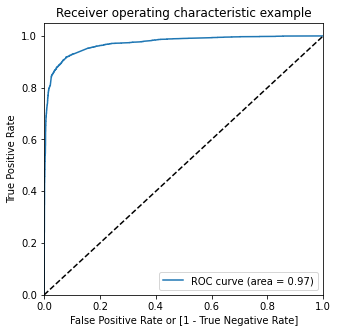

In [127]:
draw_roc( y_train_pred_final['Converted'], y_train_pred_final['Converted Probability'])

## Finding Optimal Cutoff Point

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted Probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.299769,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031112,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.472198,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.001737,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989187,1667,1,1,1,1,1,1,1,1,1,1,1


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.835168  0.971069  0.751674
0.2   0.2  0.885751  0.952201  0.844925
0.3   0.3  0.920217  0.916981  0.922205
0.4   0.4  0.922610  0.894340  0.939979
0.5   0.5  0.924366  0.871698  0.956723
0.6   0.6  0.925323  0.853669  0.969346
0.7   0.7  0.912717  0.800419  0.981710
0.8   0.8  0.904420  0.771069  0.986347
0.9   0.9  0.886868  0.717400  0.990984


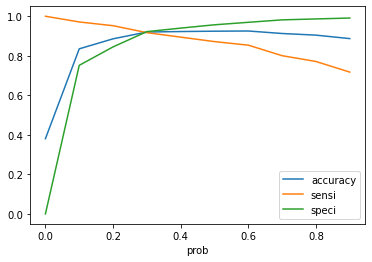

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the above curve we can see that 0.3 is the optimum point for cutoff probability

In [131]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Converted Probability'].map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,1,0.299769,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031112,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.472198,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.001737,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989187,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [132]:
#adding lead score according to conversion probability
y_train_pred_final['Lead Score'] = y_train_pred_final['Converted Probability'].map(lambda x: round(x*100))

y_train_pred_final[['Converted','Converted Probability','Prospect ID','Final_Predicted','Lead Score']]

,Converted,Converted Probability,Prospect ID,Final_Predicted,Lead Score
0,1,0.299769,9196,0,30
1,0,0.031112,4696,0,3
2,0,0.472198,3274,1,47
3,0,0.001737,2164,0,0
4,1,0.989187,1667,1,99
...,...,...,...,...,...
6262,1,0.773708,379,1,77
6263,1,0.951853,84,1,95
6264,0,0.003089,8313,0,0
6265,0,0.200984,7169,0,20


In [133]:
#lets check overall accuracy
print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted']))

0.9202170097335248


In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
print(confusion2)

[[3580  302]
 [ 198 2187]]


In [135]:
TP = confusion2[1,1] #true positives
TN = confusion2[0,0] #true negatives
FP = confusion2[0,1] #false positives
FN = confusion2[1,0] #false negatives

In [136]:
#lets check sensitivity of our model
TP/float(TP+FN)

0.9169811320754717

In [137]:
#lets check specificity of our model
TN/float(TN+FP)

0.9222050489438434

In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8786661309762958


In [139]:
#negative predicted value
print(TN/float(TN+FN))

0.9475913181577554


### We can observe our model seems to be performing well, ROC curve has a value of 0.97 which is very good

Train Data:

Accuracy : 92%

Sensitivity : 91.69%

Specificity : 92.22%

### Precision and Recall

In [140]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
print(confusion)

[[3580  302]
 [ 198 2187]]


In [141]:
#precision
#TP/TP+FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8786661309762958

In [142]:
#recall
#TP/TP+FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169811320754717

In [143]:
from sklearn.metrics import precision_score, recall_score

In [144]:
precision_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])

0.8786661309762958

In [145]:
recall_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])

0.9169811320754717

### Precision Recall Tradeoff

In [146]:
from sklearn.metrics import precision_recall_curve

In [147]:
y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted']

(0       1
 1       0
 2       0
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Converted, Length: 6267, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Final_Predicted, Length: 6267, dtype: int64)

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted Probability'])

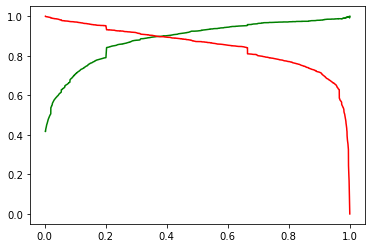

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Predictions on Test Set

In [150]:
num_cols = X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,...,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.668862,-0.304384,0.135997,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
984,-0.030697,-0.538073,0.399961,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
8135,-0.380477,0.794688,-0.127967,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6915,0.319082,-0.614753,-0.127967,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2712,-0.030697,-0.412100,0.399961,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [151]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
7681,-0.304384,1,0,0,0,0,1,0,0,0,0,1,0,0
984,-0.538073,0,0,1,0,0,1,0,0,0,1,0,0,1
8135,0.794688,1,0,0,0,0,1,0,0,0,0,0,0,0
6915,-0.614753,0,1,0,0,0,0,0,0,0,0,1,0,0
2712,-0.412100,0,1,0,0,0,0,0,0,0,0,0,1,0


In [152]:
X_test_sm = sm.add_constant(X_test)

## Predictions on Test Set

In [153]:
y_test_pred = res.predict(X_test_sm)

In [154]:
y_test_pred[:10]

7681    0.023743
984     0.020787
8135    0.681883
6915    0.004148
2712    0.941289
244     0.002045
4698    0.009925
8287    0.020263
6791    0.979737
8970    0.004219
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [156]:
y_pred_1.head()

,0
7681,0.023743
984,0.020787
8135,0.681883
6915,0.004148
2712,0.941289


In [157]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [158]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [159]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.023743
1,0,984,0.020787
2,0,8135,0.681883
3,0,6915,0.004148
4,1,2712,0.941289


In [162]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted Probability'})

In [163]:
y_pred_final.head()

,Converted,Prospect ID,Converted Probability
0,0,7681,0.023743
1,0,984,0.020787
2,0,8135,0.681883
3,0,6915,0.004148
4,1,2712,0.941289


In [164]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted Probability']]

y_pred_final['Lead Score'] = y_pred_final['Converted Probability'].map(lambda x: round(x*100))

In [165]:
y_pred_final.head()

,Prospect ID,Converted,Converted Probability,Lead Score
0,7681,0,0.023743,2
1,984,0,0.020787,2
2,8135,0,0.681883,68
3,6915,0,0.004148,0
4,2712,1,0.941289,94


In [166]:
y_pred_final['Final_Predicted'] = y_pred_final['Converted Probability'].map(lambda x: 1 if x > 0.3 else 0)

In [167]:
y_pred_final.head()

,Prospect ID,Converted,Converted Probability,Lead Score,Final_Predicted
0,7681,0,0.023743,2,0
1,984,0,0.020787,2,0
2,8135,0,0.681883,68,1
3,6915,0,0.004148,0,0
4,2712,1,0.941289,94,1


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['Final_Predicted'])

0.921072226358898

In [169]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Final_Predicted'])
confusion2

array([[1556,  120],
       [  92,  918]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [171]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9089108910891089

In [172]:
# Let us calculate specificity
TN / float(TN+FP)

0.9284009546539379

In [173]:
precision_score(y_pred_final['Converted'], y_pred_final['Final_Predicted'])

0.884393063583815

In [174]:
recall_score(y_pred_final['Converted'], y_pred_final['Final_Predicted'])

0.9089108910891089

## Observations:
After running the model on Test data we get the following result

Accuracy : 92.10%

Sensitivity : 90.89%

Specificity : 92.84%